In [57]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [58]:
start = datetime.datetime(2018, 10, 1)
end = datetime.datetime(2020, 8, 10)

In [59]:
ticker = 'nio'

In [143]:
df = data.DataReader(ticker, 'yahoo', start, end)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,7.08,6.60,7.06,6.60,16429100,6.60
2018-10-02,6.60,5.87,6.60,5.93,19440000,5.93
2018-10-03,6.55,6.12,6.12,6.30,13251200,6.30
2018-10-04,6.25,6.00,6.19,6.25,11896600,6.25
2018-10-05,6.29,6.03,6.20,6.26,8378300,6.26
...,...,...,...,...,...,...
2020-08-04,14.53,13.22,14.46,13.64,125731400,13.64
2020-08-05,14.08,13.37,13.41,13.92,60375000,13.92
2020-08-06,14.31,13.52,14.10,13.84,49787700,13.84


Text(0.5, 1.0, 'NIO Stock Closing Price')

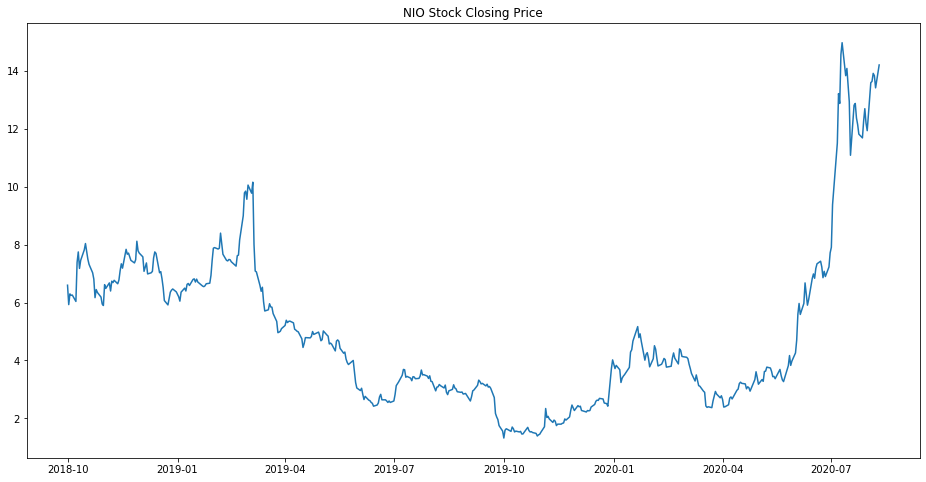

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close'])
plt.title('NIO Stock Closing Price')

In [7]:
#SMA & WMA

In [8]:
window1 = 50
window2 = 200

In [9]:
df['sma'] = df['Close'].rolling(window=window1).mean()

In [10]:
df['sma2'] = df['Close'].rolling(window=window2).mean()

In [11]:
weights = []
for i in range(0, window1):
    weights.append(i)
weights = np.array(weights)

sum_weights = np.sum(weights)

df['wma'] = df['Close'].rolling(window=window1).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False)

In [12]:
weights2 = []
for i in range(0, window2):
    weights2.append(i)
weights2 = np.array(weights2)

sum_weights2 = np.sum(weights2)

df['wma2'] = df['Close'].rolling(window=window2).apply(lambda x: np.sum(weights2*x) / sum_weights2, raw=False)

In [13]:
df

,High,Low,Open,Close,Volume,Adj Close,sma,sma2,wma,wma2
Date,,,,,,,,,,
2018-10-01,7.08,6.60,7.06,6.60,16429100,6.60,NaN,NaN,NaN,NaN
2018-10-02,6.60,5.87,6.60,5.93,19440000,5.93,NaN,NaN,NaN,NaN
2018-10-03,6.55,6.12,6.12,6.30,13251200,6.30,NaN,NaN,NaN,NaN
2018-10-04,6.25,6.00,6.19,6.25,11896600,6.25,NaN,NaN,NaN,NaN
2018-10-05,6.29,6.03,6.20,6.26,8378300,6.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-08-04,14.53,13.22,14.46,13.64,125731400,13.64,9.1706,4.58165,11.023175,5.995626
2020-08-05,14.08,13.37,13.41,13.92,60375000,13.92,9.3726,4.64365,11.208784,6.088855
2020-08-06,14.31,13.52,14.10,13.84,49787700,13.84,9.5660,4.70440,11.383233,6.180670


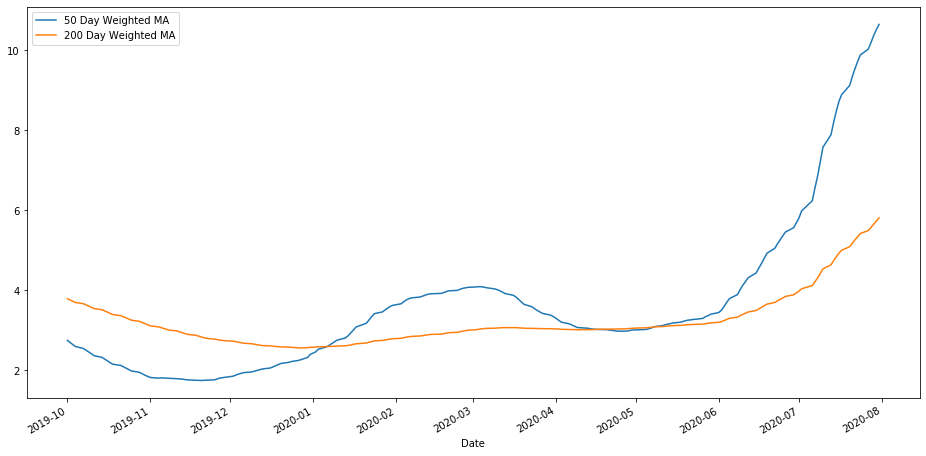

In [14]:
plt.figure(figsize=(16, 8))
df.loc['2019-10-01':'2020-08-01']['wma'].plot(label= str(window1) +' Day Weighted MA')
df.loc['2019-10-01':'2020-08-01']['wma2'].plot(label= str(window2) +' Day Weighted MA')
plt.legend()

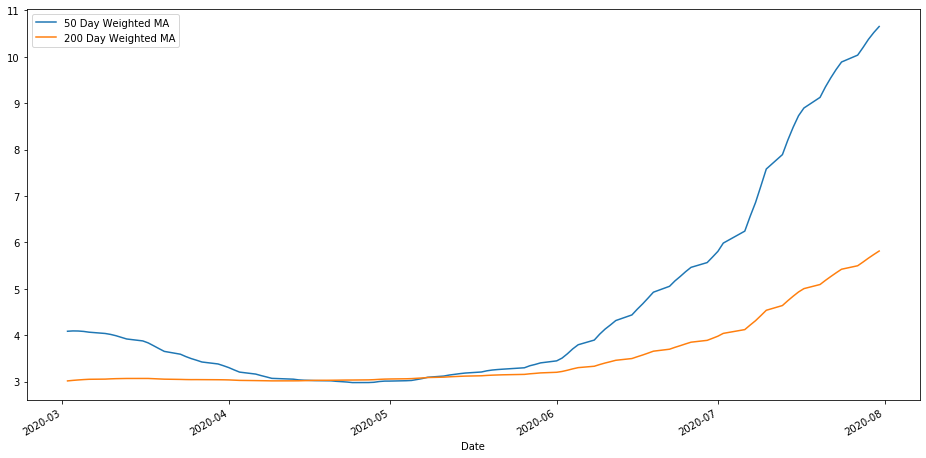

In [15]:
plt.figure(figsize=(16, 8))
df.loc['2020-03-01':'2020-08-01']['wma'].plot(label= str(window1) +' Day Weighted MA')
df.loc['2020-03-01':'2020-08-01']['wma2'].plot(label= str(window2) +' Day Weighted MA')
plt.legend()

In [16]:
# Regression Model

In [17]:
data = df[['Volume', 'Adj Close' ]]

In [18]:
forecast = 1

In [19]:
data['Prediction'] = data[['Adj Close']].shift(-forecast)

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
X = np.array(data.drop(['Prediction'], axis=1))
X = X[:-forecast]

In [21]:
y = np.array(data['Prediction'])
y = y[:-forecast]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lm_confidence = lm.score(X_test, y_test)
lm_confidence

0.9832741582728394

In [27]:
X_forecast = np.array(data.drop(['Prediction'], axis=1))[-forecast:]

In [28]:
lm_prediction = lm.predict(X_forecast)
lm_prediction

array([14.26883777])

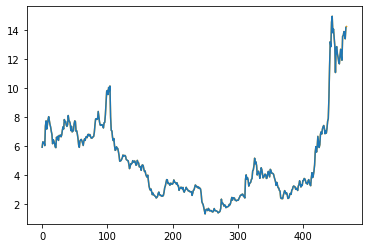

In [29]:
y1 = np.append(y, lm_prediction)
plt.plot(y1, c='orange')
plt.plot(np.array(data['Adj Close'])[forecast:])

In [30]:
# ARIMA Model

In [80]:
df = df.loc['2019-08-01':'2020-08-10']

In [81]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Text(0.5, 1.0, 'Scatter plot of closing price')

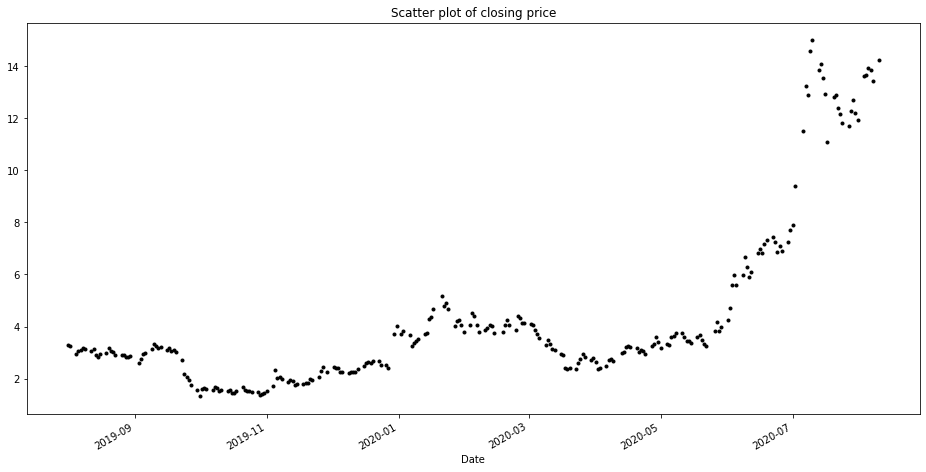

In [82]:
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')

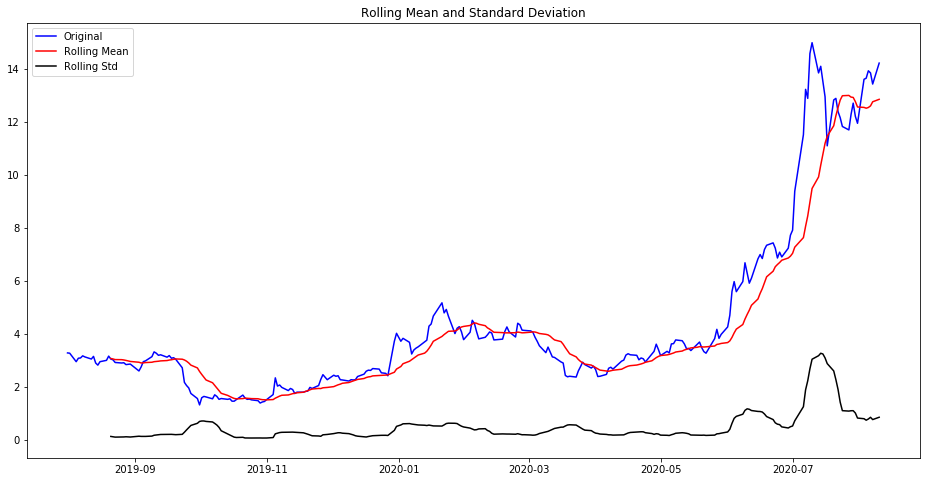

Results of dickey fuller test
Test Statistics                  0.962752
p-value                          0.993857
No. of lags used                10.000000
Number of observations used    248.000000
critical value (1%)             -3.456996
critical value (5%)             -2.873266
critical value (10%)            -2.573019
dtype: float64


In [83]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(15).mean()
    rolstd = timeseries.rolling(15).std()
    plt.plot(timeseries, color='b',label='Original')
    plt.plot(rolmean, color='r', label='Rolling Mean')
    plt.plot(rolstd, color='k', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

p-value > 0.05, fail to reject the null hypothesis that the timeseries is non-stationary;
thus need to convert it to a stationary timeseries

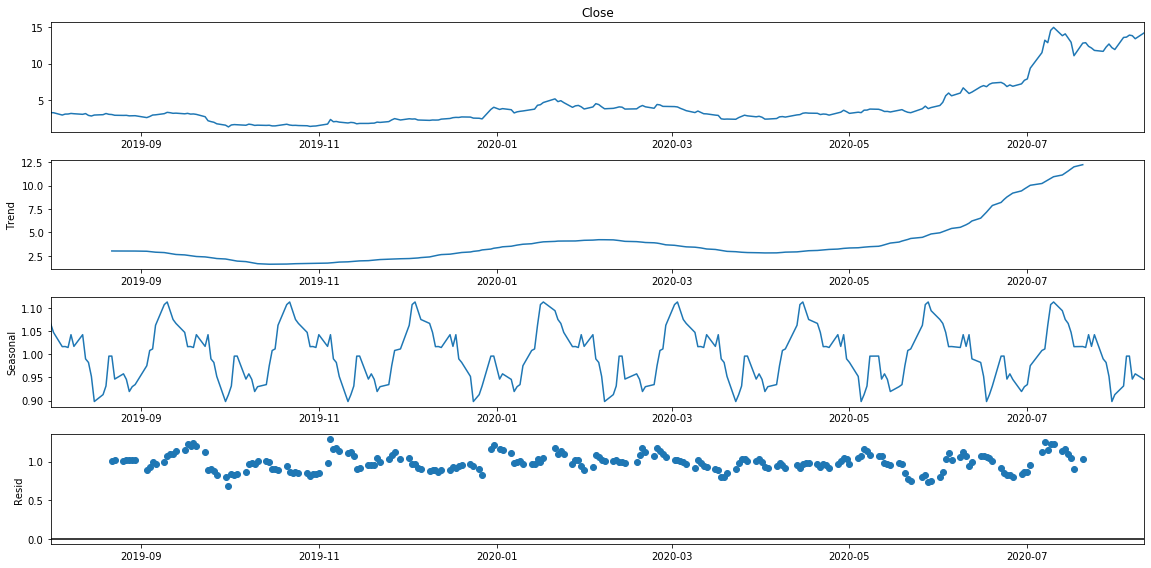

In [84]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = result.plot()  
fig.set_size_inches(16, 8)

No handles with labels found to put in legend.


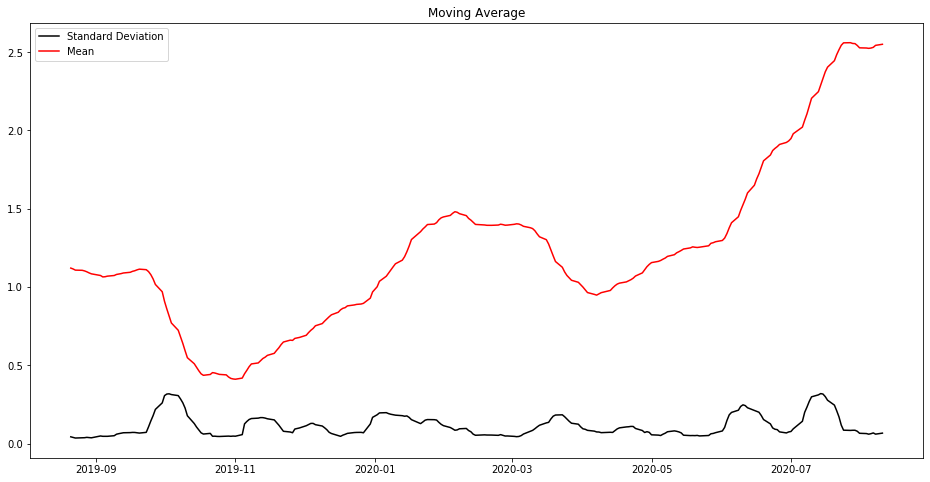

In [85]:
df_log = np.log(df_close)
moving_avg = df_log.rolling(15).mean()
std_dev = df_log.rolling(15).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ='k', label = 'Standard Deviation')
plt.plot(moving_avg, color='r', label = 'Mean')
plt.legend()

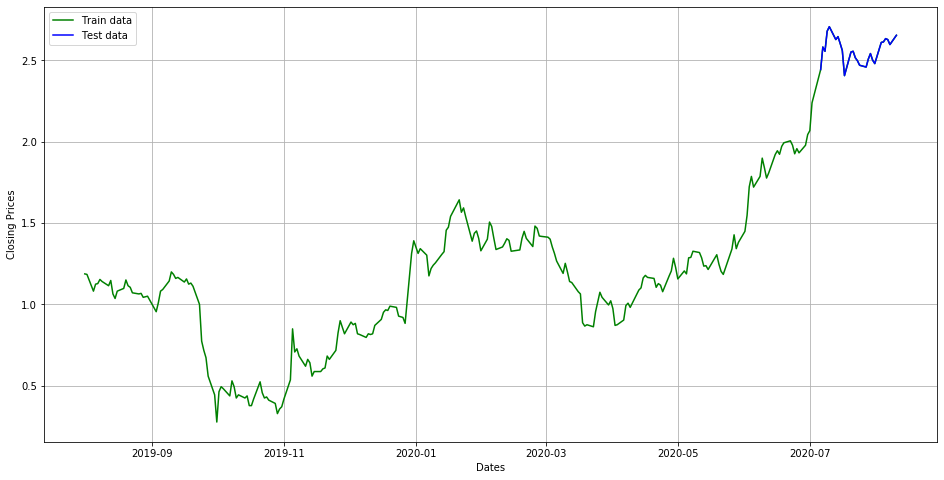

In [86]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, color='g', label='Train data')
plt.plot(test_data, color='b', label='Test data')
plt.legend()

In [87]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-556.700, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-557.273, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-557.674, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-557.632, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-557.302, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-556.683, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-555.302, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-558.788, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-558.335, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-557.701, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-558.383, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-556.348, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.086 seconds
                               SARIMAX Results                                
Dep. Vari

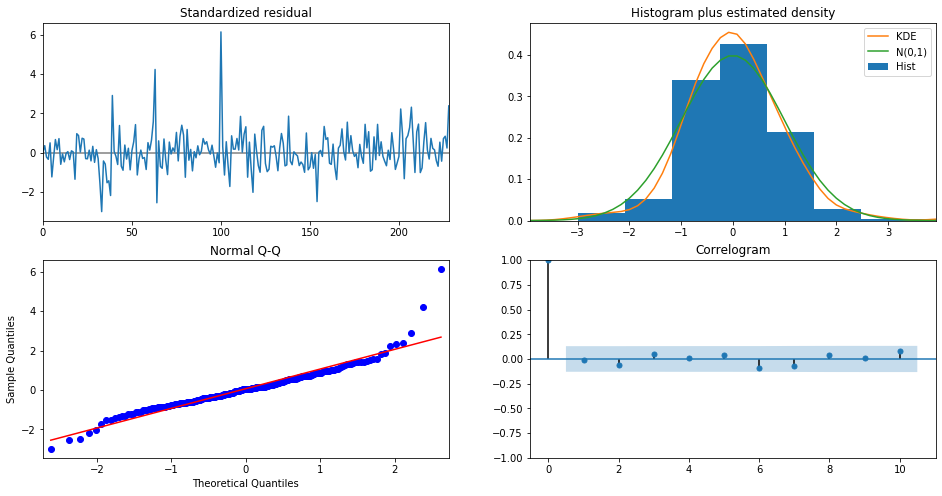

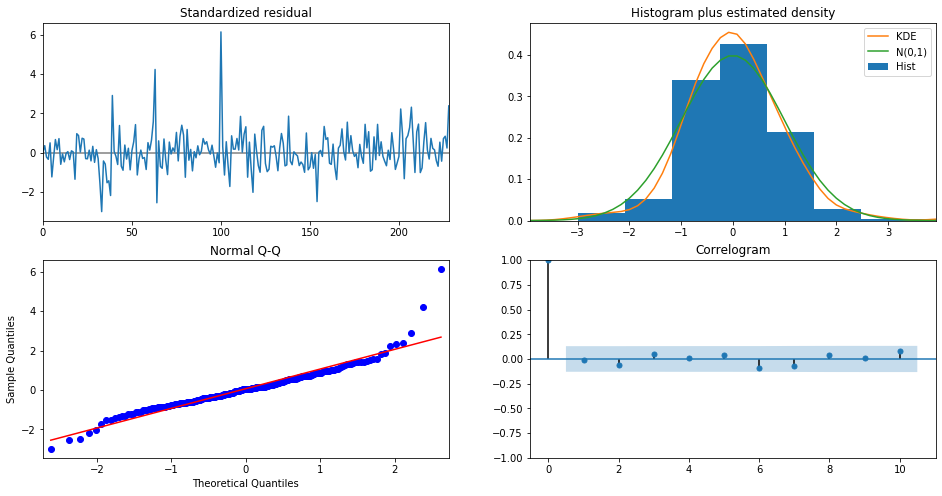

In [88]:
model_autoARIMA.plot_diagnostics(figsize=(16, 8))

In [89]:
model = ARIMA(train_data, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  229
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 281.837
Method:                       css-mle   S.D. of innovations              0.071
Date:                Wed, 12 Aug 2020   AIC                           -557.674
Time:                        23:26:30   BIC                           -547.373
Sample:                             1   HQIC                          -553.518
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0049      0.005      0.943      0.346      -0.005       0.015
ma.L1.D.Close     0.1240      0.072      1.732      0.083      -0.016       0.264
                                    Root

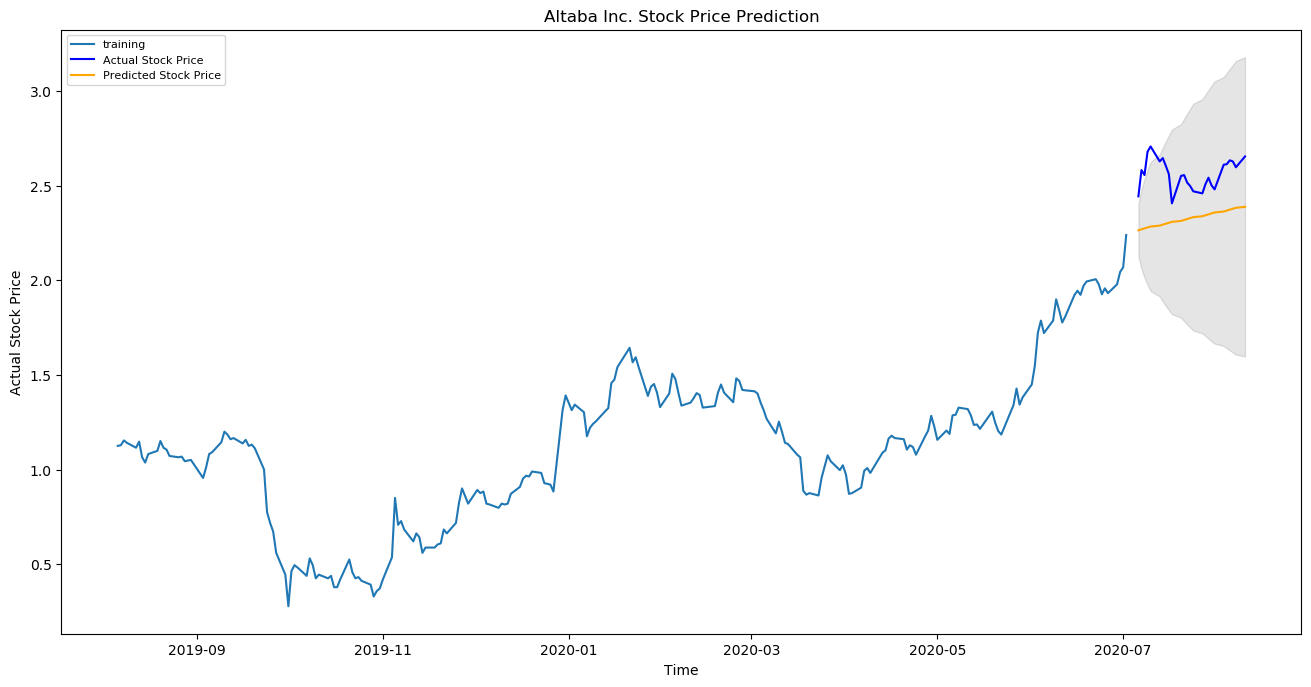

In [90]:
fc, se, conf = fitted.forecast(len(test_data.index), alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)

In [91]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.06299644447785285
MAE: 0.2366997246595463
RMSE: 0.2509909250906352
MAPE: 0.09158773695511073


In [92]:
# Re-train the model using all the data and predict into the future.

In [93]:
model_autoARIMA2 = auto_arima(df_log, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA2.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-622.694, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-624.170, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-624.566, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-623.084, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-623.843, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-623.226, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-622.003, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-625.275, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-624.482, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-623.810, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-624.890, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-622.629, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.912 seconds
                               SARIMAX Results                                
Dep. Vari

In [94]:
model2 = ARIMA(df_log, order=(0, 1, 1))  
fitted = model2.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  258
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 315.283
Method:                       css-mle   S.D. of innovations              0.071
Date:                Wed, 12 Aug 2020   AIC                           -624.566
Time:                        23:26:31   BIC                           -613.907
Sample:                             1   HQIC                          -620.280
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0057      0.005      1.140      0.254      -0.004       0.016
ma.L1.D.Close     0.1298      0.066      1.975      0.048       0.001       0.259
                                    Root

In [95]:
arima_window = 60
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))


In [96]:
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])

In [97]:
df_pred = df_log.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()

In [98]:
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

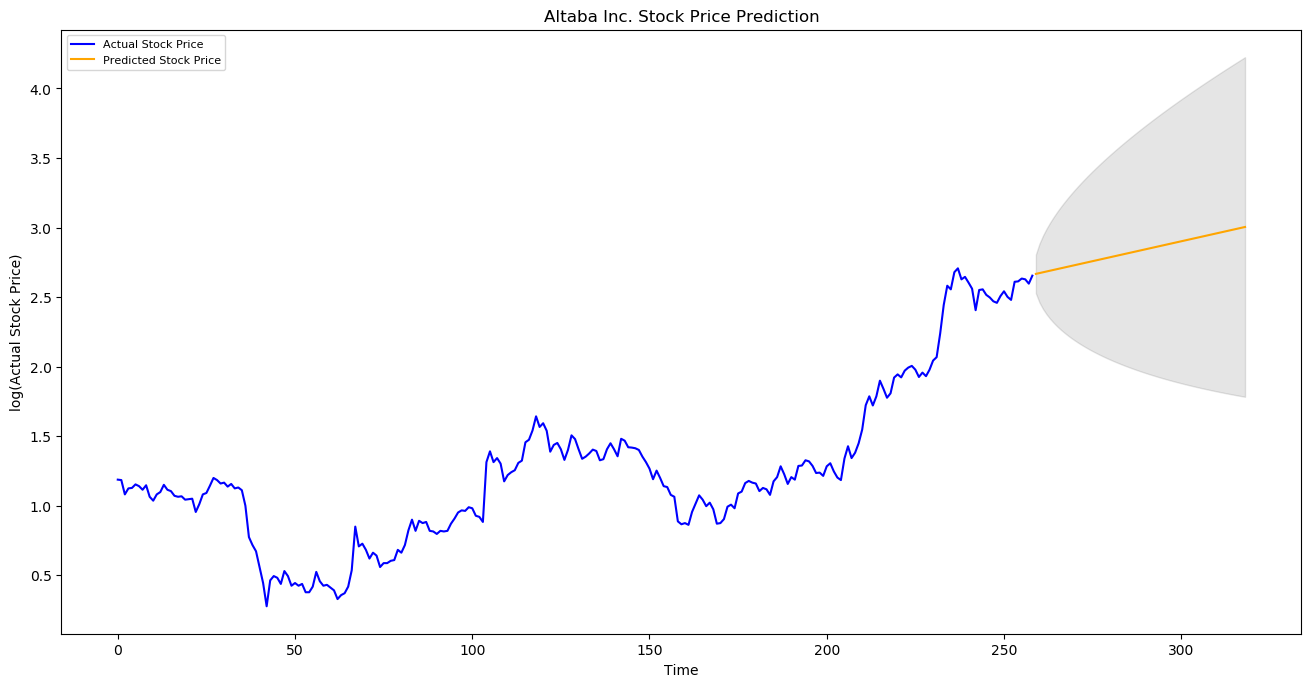

In [99]:
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Stock Price')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('log(Actual Stock Price)')
plt.legend(loc='upper left', fontsize=8)

In [100]:
# Monte Carlo Simulation

In [198]:
df = data.DataReader(ticker, 'yahoo', start, end)
df = df.loc['2019-08-01':'2020-08-10']

In [199]:
df_mc = df['Close']
last_price = df_mc[-1]
returns = df_mc.pct_change()

In [200]:
sim_num = 500
day_num = 252

In [201]:
sim_df = pd.DataFrame()

In [205]:
for x in range(sim_num):
    count = 0
    daily_vol = returns.std()
    price_series = []
    price = last_price * (1+np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(day_num):
        if count == day_num - 1:
            break
        price = price_series[count] * (1+np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
        
    sim_df[x] = price_series

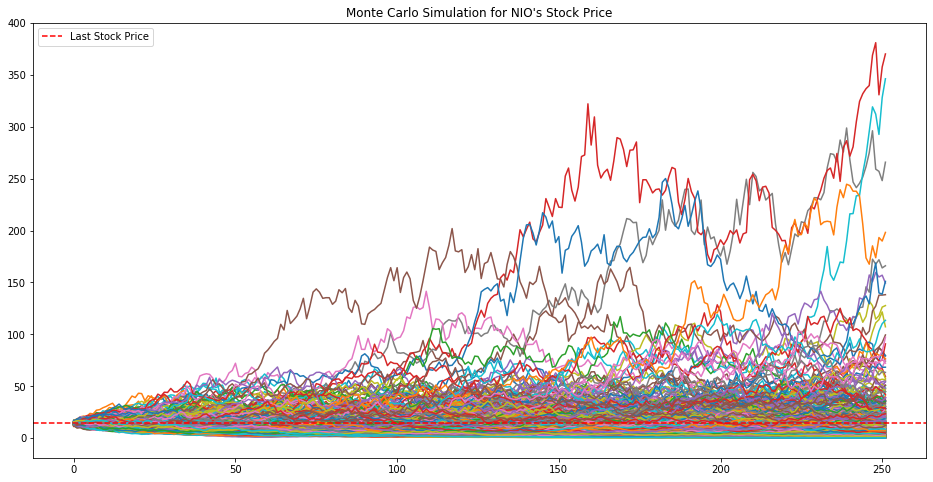

In [206]:
plt.figure(figsize=(16, 8))
plt.plot(sim_df)
plt.axhline(y=last_price, color='r', linestyle='--', label='Last Stock Price')
plt.legend()
plt.title('Monte Carlo Simulation for NIO\'s Stock Price')
plt.show()

In [207]:
sim_df.loc[day_num-1].describe()

count    500.000000
mean      16.603342
std       33.455059
min        0.114155
25%        2.821165
50%        7.163649
75%       17.302970
max      370.201019
Name: 251, dtype: float64